In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.simplefilter("ignore")

In [4]:
auto = pd.read_csv("Auto.csv")
auto.head()
X = auto.horsepower.values.reshape(-1, 1)
y = auto.mpg.values

Text(0.5, 1.0, '10 random splits of the dataset')

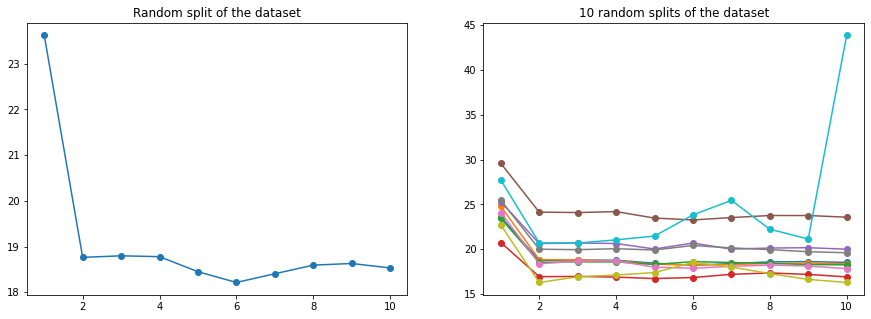

In [6]:
t_prop = 0.5
p_order = np.arange(1, 11)
r_state = np.arange(0, 10)

xx, yy = np.meshgrid(p_order, r_state, indexing="ij")
Z = np.zeros((p_order.size, r_state.size))

linreg = lm.LinearRegression()

for (i, j), _ in np.ndenumerate(Z):
    X_poly = PolynomialFeatures(degree=xx[i, j]).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=t_prop, random_state=yy[i, j])
    
    linreg.fit(X_train, y_train)
    Z[i, j] =  mean_squared_error(y_test, linreg.predict(X_test))
    
plt.figure(figsize=(15, 5))
ax1 = plt.gcf().add_subplot(121)
ax1.plot(xx.T[0], Z.T[0], '-o')
ax1.set_title("Random split of the dataset")
ax2 = plt.gcf().add_subplot(122)
ax2.plot(xx, Z, '-o')
ax2.set_title("10 random splits of the dataset")


In [10]:
X

array([[130],
       [165],
       [150],
       [150],
       [140],
       [198],
       [220],
       [215],
       [225],
       [190],
       [170],
       [160],
       [150],
       [225],
       [ 95],
       [ 95],
       [ 97],
       [ 85],
       [ 88],
       [ 46],
       [ 87],
       [ 90],
       [ 95],
       [113],
       [ 90],
       [215],
       [200],
       [210],
       [193],
       [ 88],
       [ 90],
       [ 95],
       [100],
       [105],
       [100],
       [ 88],
       [100],
       [165],
       [175],
       [153],
       [150],
       [180],
       [170],
       [175],
       [110],
       [ 72],
       [100],
       [ 88],
       [ 86],
       [ 90],
       [ 70],
       [ 76],
       [ 65],
       [ 69],
       [ 60],
       [ 70],
       [ 95],
       [ 80],
       [ 54],
       [ 90],
       [ 86],
       [165],
       [175],
       [150],
       [153],
       [150],
       [208],
       [155],
       [160],
       [190],
       [ 97],
      

In [79]:
p_order = np.arange(1, 11)
r_state = np.arange(0, 10)

#LeaveOneOut CV
loo = LeaveOneOut()
linreg = lm.LinearRegression()
poly = PolynomialFeatures(degree=5)
scores = []
X_poly = poly.fit_transform(X)

for i in p_order:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    scores.append(cross_val_score(linreg, X=X_poly, y=y, cv=loo, scoring=make_scorer(mean_squared_error)).mean())
#10 fold CV
xx, yy = np.meshgrid(p_order, r_state, indexing="ij")
Z = np.zeros(xx.shape)
for (i, j), _ in np.ndenumerate(Z):
    kfold = KFold(n_splits=10, random_state=yy[i, j])
    poly = PolynomialFeatures(degree=xx[i, j])
    X_poly = poly.fit_transform(X)
    Z[i, j] = cross_val_score(linreg, X=X_poly, y=y, cv=kfold, scoring=make_scorer(mean_squared_error)).mean()

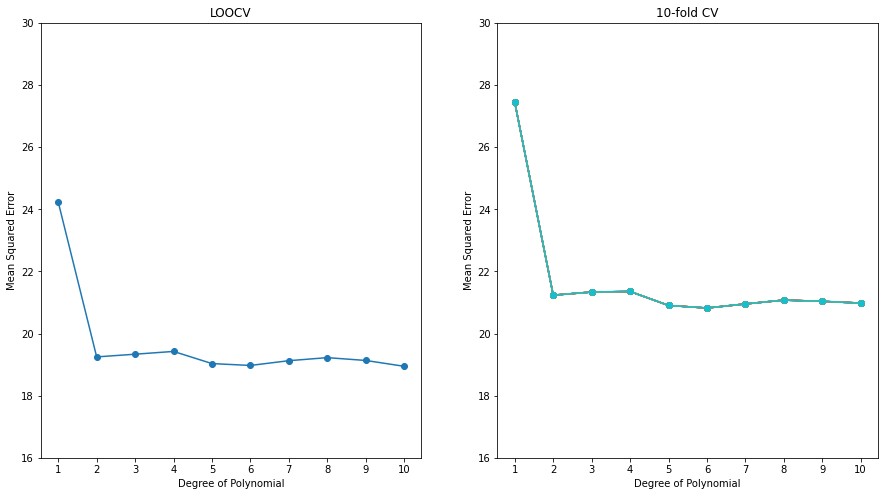

In [80]:
#plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(p_order, scores, '-o')
ax1.set(xlabel="Degree of Polynomial", ylabel="Mean Squared Error", title="LOOCV")
ax2.plot(xx, Z, '-o')
ax2.set(xlabel="Degree of Polynomial", ylabel="Mean Squared Error", TITLE="10-fold CV")
for ax in fig.axes:
    ax.set_xticks(p_order)
    ax.set_ylim(16, 30)

## Applied

In [228]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import r2_score
from sklearn.utils import resample

In [6]:
default = pd.read_csv("default.csv")
default.default = default.default.map({"No": 0, "Yes": 1})
default["student"] = default.student.replace({"No": 0, "Yes": 1})

(a) Fit a logistic regression model that uses income and balance to
predict default.

In [8]:
default

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


In [10]:
est = smf.logit("default ~ income + balance", data=default).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-11.5405,0.435,-26.544,0.000,-12.393,-10.688
income,2.081e-05,4.99e-06,4.174,0.000,1.1e-05,3.06e-05
balance,0.0056,0.000,24.835,0.000,0.005,0.006


(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

In [13]:
X = default[["income", "balance"]].values
y = default["default"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training error:", logreg.score(X_train, y_train))

Training error: 0.9744


In [17]:
print("Test error:", logreg.score(X_test, y_test))

Test error: 0.972


(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment
on the results obtained.

In [20]:
train_scores = []
val_scores = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    logreg.fit(X_train, y_train)
    train_scores.append(logreg.score(X_train, y_train))
    val_scores.append(logreg.score(X_test, y_test))

In [21]:
train_scores

[0.9678666666666667, 0.9657333333333333, 0.964]

In [26]:
np.std(val_scores)

0.004781445620544274

In [28]:
np.std(train_scores)

0.0015813730555250909

Comment: there is no much variability in validation scores due to the high number of observations in the dataset.

(d) Now consider a logistic regression model that predicts the probability
of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation
set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [29]:
est = smf.logit("default ~ balance + income + student", data=default).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-10.8690,0.492,-22.079,0.000,-11.834,-9.904
balance,0.0057,0.000,24.737,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05
student,-0.6468,0.236,-2.738,0.006,-1.110,-0.184


p-value for income is quite high meaning that income is likely to be unasscoated with y

In [31]:
X = default[["income", "balance", "student"]].values
y = default["default"].values

In [32]:
train_scores = []
val_scores = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    logreg.fit(X_train, y_train)
    train_scores.append(logreg.score(X_train, y_train))
    val_scores.append(logreg.score(X_test, y_test))

In [33]:
train_scores

[0.9678666666666667, 0.9657333333333333, 0.964]

In [34]:
val_scores

[0.9612, 0.9684, 0.9728]

6) We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for
the standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using
the standard formula for computing the standard errors in the glm()
function. Do not forget to set a random seed before beginning your
analysis.

In [38]:
X = X[:, :2] #using only income and balance

In [62]:
resample(X, y, n_samples=2)

[array([[47147.7259453 ,  1088.67407721],
        [64135.4310819 ,  2024.82021156]]),
 array([0, 1], dtype=int64)]

In [121]:
intercepts = []
coefficients = []
scores = []
for i in range(100):
    X_boostrap, y_boostrap = resample(X, y, n_samples=X.shape[0], random_state=i, replace=True)
    logreg.fit(X_boostrap, y_boostrap)
    intercepts.extend(logreg.intercept_)
    coefficients.extend(logreg.coef_)
    scores.append(logreg.score(X_boostrap, y_boostrap))

In [122]:
results = pd.DataFrame({"intercept": intercepts, "coefficients": coefficients, "scores": scores})

In [104]:
intercepts

[-1.0896381997198369e-06]

In [115]:
np.c_[np.ones(X.shape[0]), X]

array([[1.00000000e+00, 4.43616251e+04, 7.29526495e+02],
       [1.00000000e+00, 1.21061347e+04, 8.17180407e+02],
       [1.00000000e+00, 3.17671389e+04, 1.07354916e+03],
       ...,
       [1.00000000e+00, 5.86361570e+04, 8.45411989e+02],
       [1.00000000e+00, 3.66691124e+04, 1.56900905e+03],
       [1.00000000e+00, 1.68629523e+04, 2.00922183e+02]])

In [116]:
import statsmodels.api as sm
est = sm.Logit(y, np.c_[np.ones(X.shape[0]), X]).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-11.5405,0.435,-26.544,0.000,-12.393,-10.688
x1,2.081e-05,4.99e-06,4.174,0.000,1.1e-05,3.06e-05
x2,0.0056,0.000,24.835,0.000,0.005,0.006


In [114]:
logreg.intercept_

array([-1.0896382e-06])

In [101]:
est = smf.logit("default ~ balance + income ", data=default).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-11.5405,0.435,-26.544,0.000,-12.393,-10.688
balance,0.0056,0.000,24.835,0.000,0.005,0.006
income,2.081e-05,4.99e-06,4.174,0.000,1.1e-05,3.06e-05


In [102]:
est.bse

Intercept    0.434772
balance      0.000227
income       0.000005
dtype: float64

In [97]:
y[X[:, 0] == 64135.4310819]

array([1], dtype=int64)

In [135]:
results["intercept"].explode()

0     -0.000001
1     -0.000002
2     -0.000001
3    -11.279084
4     -0.000001
        ...    
95    -0.000001
96    -0.000001
97   -11.106131
98    -0.000001
99   -11.296577
Name: intercept, Length: 100, dtype: float64

In [156]:
cols = [j for i in results for j in results[i].apply(pd.Series)]

In [104]:
intercepts

[-1.0896381997198369e-06]

In [115]:
np.c_[np.ones(X.shape[0]), X]

array([[1.00000000e+00, 4.43616251e+04, 7.29526495e+02],
       [1.00000000e+00, 1.21061347e+04, 8.17180407e+02],
       [1.00000000e+00, 3.17671389e+04, 1.07354916e+03],
       ...,
       [1.00000000e+00, 5.86361570e+04, 8.45411989e+02],
       [1.00000000e+00, 3.66691124e+04, 1.56900905e+03],
       [1.00000000e+00, 1.68629523e+04, 2.00922183e+02]])

In [116]:
import statsmodels.api as sm
est = sm.Logit(y, np.c_[np.ones(X.shape[0]), X]).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-11.5405,0.435,-26.544,0.000,-12.393,-10.688
x1,2.081e-05,4.99e-06,4.174,0.000,1.1e-05,3.06e-05
x2,0.0056,0.000,24.835,0.000,0.005,0.006


In [114]:
logreg.intercept_

array([-1.0896382e-06])

In [101]:
est = smf.logit("default ~ balance + income ", data=default).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-11.5405,0.435,-26.544,0.000,-12.393,-10.688
balance,0.0056,0.000,24.835,0.000,0.005,0.006
income,2.081e-05,4.99e-06,4.174,0.000,1.1e-05,3.06e-05


In [102]:
est.bse

Intercept    0.434772
balance      0.000227
income       0.000005
dtype: float64

7) In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be
used in order to compute the LOOCV test error estimate. Alternatively,
one could compute those quantities using just the glm() and
predict.glm() functions, and a for loop. You will now take this approach
in order to compute the LOOCV error for a simple logistic
regression model on the Weekly data set. Recall that in the context
of classification problems, the LOOCV error is given in (5.4).

In [211]:
weekly = pd.read_csv("Weekly.csv")
weekly.head()
weekly["Direction"] = weekly["Direction"].map({"Down": 0, "Up": 1})

(a) Fit a logistic regression model that predicts Direction using Lag1
and Lag2.

In [227]:
X = weekly[["Lag1", "Lag2"]]
y = weekly["Direction"]
logreg.fit(X, y)
logreg.score(X, y)

0.5546372819100092

(b) Fit a logistic regression model that predicts Direction using Lag1
and Lag2 using all but the first observation.

In [220]:
X = X.values[1:, :]
y = y.values[1:]
logreg.fit(X, y)
logreg.score(X, y)

0.5569852941176471

In [232]:
loo = LeaveOneOut()
kfold = KFold(n_splits=X.shape[0])
cross_val_score(estimator=logreg, X=X, y=y, cv=kfold, scoring="accuracy").mean()

0.5500459136822773

In [233]:
cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring="accuracy").mean()

0.5509745064051071